In [1]:
from lcapy import Circuit
from numpy import linspace
from matplotlib.pyplot import savefig

# Example Circuit

In [2]:

example = Circuit("""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
W 0_3 0_4; right""")


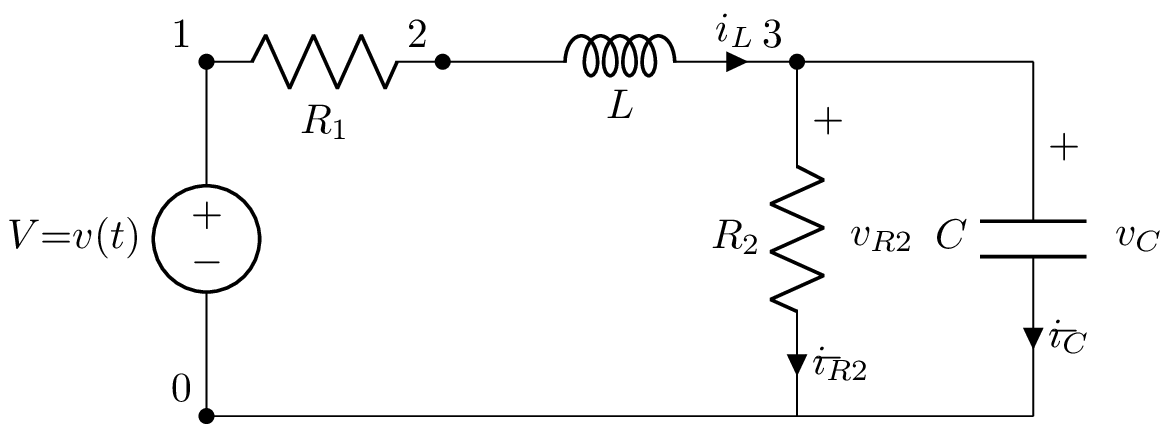

In [3]:
example.draw()

In [4]:
ss = example.ss

In [5]:
ss.state_equations()

⎡d         ⎤   ⎡-R₁   -1  ⎤                      
⎢──(i_L(t))⎥   ⎢────  ─── ⎥            ⎡1⎤       
⎢dt        ⎥   ⎢ L     L  ⎥ ⎡i_L(t)⎤   ⎢─⎥       
⎢          ⎥ = ⎢          ⎥⋅⎢      ⎥ + ⎢L⎥⋅[v(t)]
⎢d         ⎥   ⎢ 1    -1  ⎥ ⎣v_C(t)⎦   ⎢ ⎥       
⎢──(v_C(t))⎥   ⎢ ─    ────⎥            ⎣0⎦       
⎣dt        ⎦   ⎣ C    C⋅R₂⎦                      

In [6]:
ss.output_equations()

            ⎡ 0    0 ⎤                      
            ⎢        ⎥                      
⎡ v₁(t) ⎤   ⎢-R₁   0 ⎥            ⎡1⎤       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢ v₂(t) ⎥   ⎢ 0    1 ⎥            ⎢1⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢ v₃(t) ⎥   ⎢-1    0 ⎥            ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢i_V(t) ⎥   ⎢ 1    0 ⎥ ⎡i_L(t)⎤   ⎢0⎥       
⎢       ⎥ = ⎢        ⎥⋅⎢      ⎥ + ⎢ ⎥⋅[v(t)]
⎢i_R1(t)⎥   ⎢ 1    0 ⎥ ⎣v_C(t)⎦   ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢i_L(t) ⎥   ⎢     1  ⎥            ⎢0⎥       
⎢       ⎥   ⎢ 0   ── ⎥            ⎢ ⎥       
⎢i_R2(t)⎥   ⎢     R₂ ⎥            ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎣i_C(t) ⎦   ⎢     -1 ⎥            ⎣0⎦       
            ⎢ 1   ───⎥                      
            ⎣      R₂⎦                      

# LCL Circuit

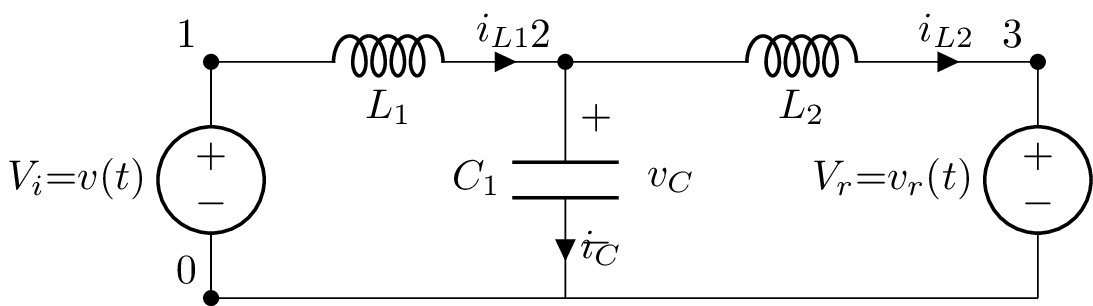

In [7]:
# Definindo o circuito LCL corrigido
lcl = Circuit("""
Vi 1 0 {v(t)}; down
L1 1 2 ; right=1.5, i={i_{L1}}
C1 2 0_2 ; down, i={i_C}, v={v_C}
L2 2 3 ; right=2, i={i_{L2}}
Vr 3 0_3 {vr(t)}; down
W 0 0_2; right
W 0_2 0_3; right

""")

lcl.draw()

In [8]:
lcl_ss = lcl.ss

In [9]:
lcl_ss.state_equations()

⎡d          ⎤   ⎡         -1 ⎤                              
⎢──(i_L1(t))⎥   ⎢0    0   ───⎥             ⎡1      ⎤        
⎢dt         ⎥   ⎢          L₁⎥             ⎢──   0 ⎥        
⎢           ⎥   ⎢            ⎥ ⎡i_L1(t)⎤   ⎢L₁     ⎥        
⎢d          ⎥   ⎢         1  ⎥ ⎢       ⎥   ⎢       ⎥ ⎡v(t) ⎤
⎢──(i_L2(t))⎥ = ⎢0    0   ── ⎥⋅⎢i_L2(t)⎥ + ⎢    -1 ⎥⋅⎢     ⎥
⎢dt         ⎥   ⎢         L₂ ⎥ ⎢       ⎥   ⎢0   ───⎥ ⎣vᵣ(t)⎦
⎢           ⎥   ⎢            ⎥ ⎣v_C1(t)⎦   ⎢     L₂⎥        
⎢d          ⎥   ⎢1   -1      ⎥             ⎢       ⎥        
⎢──(v_C1(t))⎥   ⎢──  ───   0 ⎥             ⎣0    0 ⎦        
⎣dt         ⎦   ⎣C₁   C₁     ⎦                              

In [10]:
lcl_ss.output_equations()

⎡ v₁(t) ⎤   ⎡0   0   0⎤             ⎡1  0⎤        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎢ v₂(t) ⎥   ⎢0   0   1⎥             ⎢0  0⎥        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎢ v₃(t) ⎥   ⎢0   0   0⎥             ⎢0  1⎥        
⎢       ⎥   ⎢         ⎥ ⎡i_L1(t)⎤   ⎢    ⎥        
⎢i_Vi(t)⎥   ⎢-1  0   0⎥ ⎢       ⎥   ⎢0  0⎥ ⎡v(t) ⎤
⎢       ⎥ = ⎢         ⎥⋅⎢i_L2(t)⎥ + ⎢    ⎥⋅⎢     ⎥
⎢i_L1(t)⎥   ⎢1   0   0⎥ ⎢       ⎥   ⎢0  0⎥ ⎣vᵣ(t)⎦
⎢       ⎥   ⎢         ⎥ ⎣v_C1(t)⎦   ⎢    ⎥        
⎢i_C1(t)⎥   ⎢1   -1  0⎥             ⎢0  0⎥        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎢i_L2(t)⎥   ⎢0   1   0⎥             ⎢0  0⎥        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎣i_Vr(t)⎦   ⎣0   1   0⎦             ⎣0  0⎦        

# LCL Circuit (w/ damp)

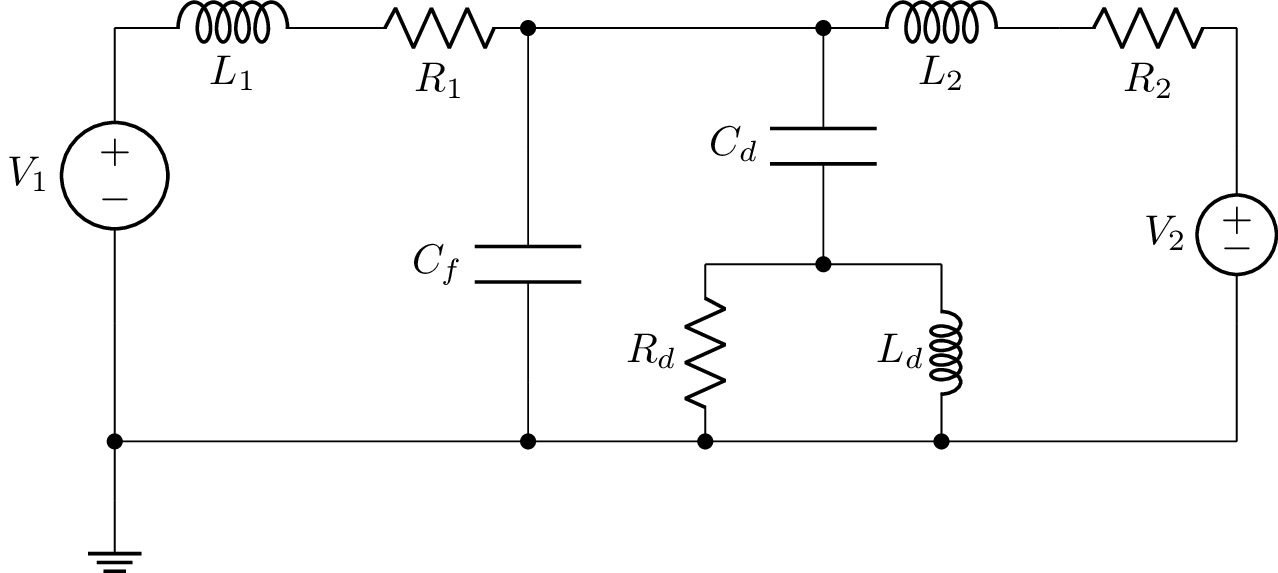

In [11]:

lcl_damp = Circuit("""
# Created by lcapy-tk V0.94
; nodes={1@(2.5, 7.5), 2@(2.5, 5), 3@(4.5, 7.5), 4@(6, 7.5), 5@(6, 6.5), 6@(6, 4.5), 7@(8.5, 7.5), 8@(8.5, 5.5), 9@(7.5, 5.5), 10@(7.5, 4), 11@(9.5, 5.5), 12@(9.5, 4), 13@(2.5, 4), 14@(6, 4), 15@(10.5, 7.5), 16@(12, 7.5), 17@(12, 6.5), 18@(12, 5), 19@(12, 4), 0@(2.5, 3.5)}
V1 1 2; down=1.25
L1 1 3; right
R1 3 4; right=0.75, scale=0.75
Cf 5 6; down
W1 4 5; down=0.5, scale=0.5
Rd 9 10; down=0.75, scale=0.75
Cd 7 8; down
Ld 11 12; down=0.75, scale=0.75
W2 4 7; right=1.25
W3 9 8; right=0.5, scale=0.5
W4 8 11; right=0.5, scale=0.5
W5 10 12; right
W6 2 13; down=0.5, scale=0.5
W7 6 14; down=0.25, scale=0.25
W8 13 14; right=1.75
W9 14 10; right=0.75, scale=0.75
L2 7 15; right
R2 15 16; right=0.75, scale=0.75
V2 17 18; down=0.75, scale=0.75
W10 12 19; right=1.25
W11 18 19; down=0.5, scale=0.5
W12 16 17; down=0.5, scale=0.5
W13 13 0; down=0.25, scale=0.25, ground
; draw_nodes=connections, label_nodes=none, style=american, voltage_dir=RP, label_style=name


""")

lcl_damp.draw()

In [12]:
lcl_damp_ss = lcl_damp.ss

/home/contardii/.local/lib/python3.10/site-packages/lcapy/matrix.py:297: UserWarning: 
This may take a while...  A symbolic matrix inversion is O(10^3) for a matrix
of size 10x10
  warn("""


In [13]:
lcl_damp_ss.state_equations()

⎡d          ⎤   ⎡-R₁                -1            ⎤                           
⎢──(i_L1(t))⎥   ⎢────   0    0      ───       0   ⎥                           
⎢dt         ⎥   ⎢ L₁                 L₁           ⎥                           
⎢           ⎥   ⎢                                 ⎥             ⎡1      ⎤     
⎢d          ⎥   ⎢                    1       -1   ⎥             ⎢──   0 ⎥     
⎢──(i_Ld(t))⎥   ⎢ 0     0    0      ───      ───  ⎥ ⎡i_L1(t)⎤   ⎢L₁     ⎥     
⎢dt         ⎥   ⎢                   L_d      L_d  ⎥ ⎢       ⎥   ⎢       ⎥     
⎢           ⎥   ⎢                                 ⎥ ⎢i_Ld(t)⎥   ⎢0    0 ⎥     
⎢d          ⎥   ⎢           -R₂     1             ⎥ ⎢       ⎥   ⎢       ⎥ ⎡V₁⎤
⎢──(i_L2(t))⎥ = ⎢ 0     0   ────    ──        0   ⎥⋅⎢i_L2(t)⎥ + ⎢    -1 ⎥⋅⎢  ⎥
⎢dt         ⎥   ⎢            L₂     L₂            ⎥ ⎢       ⎥   ⎢0   ───⎥ ⎣V₂⎦
⎢           ⎥   ⎢                                 ⎥ ⎢v_Cf(t)⎥   ⎢     L₂⎥     
⎢d          ⎥   ⎢ 1    -1   -1      -1        1   ⎥ 

In [14]:
lcl_damp_ss.output_equations()

            ⎡0   0   0    0    0 ⎤                        
            ⎢                    ⎥                        
            ⎢0   0   0    1   -1 ⎥                        
⎡ v₁(t) ⎤   ⎢                    ⎥             ⎡1  0⎤     
⎢       ⎥   ⎢0   0   R₂   0    0 ⎥             ⎢    ⎥     
⎢v₁₁(t) ⎥   ⎢                    ⎥             ⎢0  0⎥     
⎢       ⎥   ⎢0   0   0    0    0 ⎥             ⎢    ⎥     
⎢v₁₅(t) ⎥   ⎢                    ⎥             ⎢0  1⎥     
⎢       ⎥   ⎢R₁  0   0    1    0 ⎥             ⎢    ⎥     
⎢v₁₆(t) ⎥   ⎢                    ⎥             ⎢0  1⎥     
⎢       ⎥   ⎢0   0   0    1    0 ⎥             ⎢    ⎥     
⎢ v₃(t) ⎥   ⎢                    ⎥             ⎢0  0⎥     
⎢       ⎥   ⎢-1  0   0    0    0 ⎥             ⎢    ⎥     
⎢ v₄(t) ⎥   ⎢                    ⎥             ⎢0  0⎥     
⎢       ⎥   ⎢1   0   0    0    0 ⎥ ⎡i_L1(t)⎤   ⎢    ⎥     
⎢i_V1(t)⎥   ⎢                    ⎥ ⎢       ⎥   ⎢0  0⎥     
⎢       ⎥   ⎢1   0   0    0    0 ⎥ ⎢i_Ld(t)⎥   ⎢    ⎥   